In [1]:
# Importing important libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Getting the whole content of the url
box_office_url = 'https://www.boxofficemojo.com/releasegroup/gr629756421/'
box_office_response = requests.get(box_office_url)
box_office_soup = BeautifulSoup(box_office_response.content, 'html.parser')

In [3]:
# Defining our lists
country = []
opening = []
gross = []

In [4]:
# Extracting the needed data from the link
box_office_data = box_office_soup.findAll('table', attrs= {'class' : 'a-bordered a-horizontal-stripes mojo-table releases-by-region'})

In [5]:
# Iterating through the extracted data and storing it into the lists
for table in box_office_data:
    rows = table.find_all('tr')
    for row in rows:
        # Checking if there is a 'td' element in the current row
        td_element = row.find_all('td')
        # Ensuring there are three columns (country, opening, gross)
        if len(td_element) == 4:
            country_name = td_element[0].find('a').text.strip()
            opening_value = td_element[2].text.strip().replace('$', '').replace(',', '')
            gross_value = td_element[3].text.strip().replace('$', '').replace(',', '')
                
            country.append(country_name)
            opening.append(opening_value)
            gross.append(gross_value)

In [6]:
# Checking if we got the data count as intended and cleaning the data
print(np.count_nonzero(country))
print(np.count_nonzero(opening))
print(np.count_nonzero(gross))
# Replacing the 'Domestic' value into 'USA & Canada' 
country = [c.replace("Domestic", "USA & Canada") for c in country]

35
35
35


In [7]:
# Creating the dataframe
box_office_dic = {'country' : country, 'opening income' : opening, 'total earnings' : gross}
box_office_DF = pd.DataFrame(box_office_dic)

In [8]:
# Data cleaning and checking the data
box_office_DF['opening income'] = box_office_DF['opening income'].str.replace(r'[^0-9]', '0', regex=True)
box_office_DF['opening income'] = box_office_DF['opening income'].astype(float)
box_office_DF['total earnings'] = box_office_DF['total earnings'].astype(float)
box_office_DF

,country,opening income,total earnings
0,USA & Canada,162022044.0,616027000.0
1,Bulgaria,257216.0,1241652.0
2,Croatia,434788.0,1434712.0
3,Czech Republic,874969.0,5562027.0
4,France,9961544.0,42622221.0
5,Germany,6712904.0,53505245.0
6,Hungary,661089.0,3590661.0
7,Iceland,163415.0,967079.0
8,Italy,8585116.0,33524806.0
9,Lithuania,242034.0,1200380.0


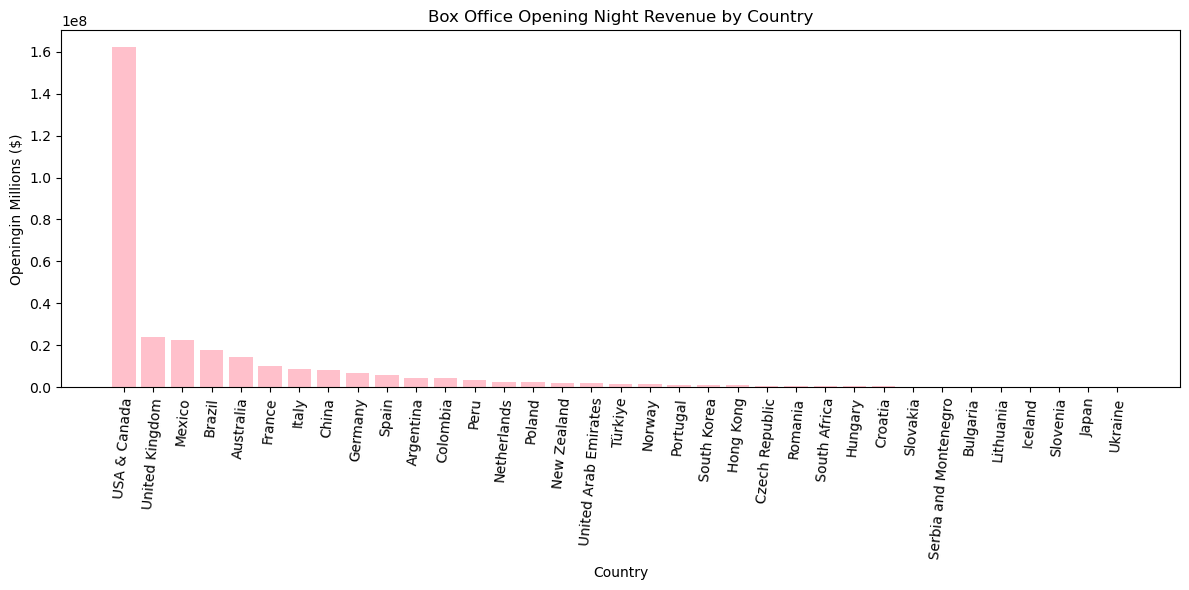

In [9]:
# Data visualizing for the highest opening countries
df_sorted = box_office_DF.sort_values(by='opening income', ascending=False)
plt.figure(figsize = (12, 6))
plt.bar(df_sorted['country'], df_sorted['opening income'], color = 'pink')
plt.xlabel('Country')
plt.ylabel('Openingin Millions ($)')
plt.title('Box Office Opening Night Revenue by Country')
plt.xticks(rotation = 85)
plt.tight_layout()

plt.show()